## Part 2 - IPL Game Comparision

In [37]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
#Import IPL ball by ball dataset
IPLbyb = pd.read_excel('Data\IPLbyb.xlsx')
print(IPLbyb.columns.tolist())

['home team', 'batting_team', 'bowling_team', 'gameno', 'innings_number', 'over_no', 'ball_no', 'runs_total_end', 'delivery_no', 'delno^2', 'runs*wkts', 'wicket', 'wkts_total_end']


In [86]:
#Selecting games games played by kings XI punjab as home team
punjab = IPLbyb[(IPLbyb['home team'] == 'Kings XI Punjab')  & 
                      ((IPLbyb['batting_team'] == 'Delhi Daredevils') | 
                       (IPLbyb['bowling_team'] == 'Delhi Daredevils'))]
punjab['home team'].count()

238

In [93]:
punjab.head()

,home team,batting_team,bowling_team,gameno,innings_number,over_no,ball_no,runs_total_end,delivery_no,delno^2,runs*wkts,wicket,wkts_total_end
246,Kings XI Punjab,Delhi Daredevils,Kings XI Punjab,2,1,0,1,1,1,1,0,0,0
247,Kings XI Punjab,Delhi Daredevils,Kings XI Punjab,2,1,0,2,3,2,4,0,0,0
248,Kings XI Punjab,Delhi Daredevils,Kings XI Punjab,2,1,0,3,4,3,9,0,0,0
249,Kings XI Punjab,Delhi Daredevils,Kings XI Punjab,2,1,0,4,4,4,16,0,0,0
250,Kings XI Punjab,Delhi Daredevils,Kings XI Punjab,2,1,0,5,5,5,25,0,0,0


In [87]:
#Selecting games games played by Delhi daredevils as home team
devils = IPLbyb[(IPLbyb['home team'] == 'Delhi Daredevils')  & 
                      ((IPLbyb['batting_team'] == 'Kings XI Punjab') | 
                       (IPLbyb['bowling_team'] == 'Kings XI Punjab'))]
devils['home team'].count()

251

In [88]:
#Appending kings and derevevils games
pun_devils = punjab.append(devils)
pun_devils = pun_devils.sort_index(ascending = True)
pun_devils = pun_devils.reset_index()
pun_devils.head()

,index,home team,batting_team,bowling_team,gameno,innings_number,over_no,ball_no,runs_total_end,delivery_no,delno^2,runs*wkts,wicket,wkts_total_end
0,246,Kings XI Punjab,Delhi Daredevils,Kings XI Punjab,2,1,0,1,1,1,1,0,0,0
1,247,Kings XI Punjab,Delhi Daredevils,Kings XI Punjab,2,1,0,2,3,2,4,0,0,0
2,248,Kings XI Punjab,Delhi Daredevils,Kings XI Punjab,2,1,0,3,4,3,9,0,0,0
3,249,Kings XI Punjab,Delhi Daredevils,Kings XI Punjab,2,1,0,4,4,4,16,0,0,0
4,250,Kings XI Punjab,Delhi Daredevils,Kings XI Punjab,2,1,0,5,5,5,25,0,0,0


In [42]:
# First, the function for plotting the runs and wickets for each team in a game.
def plot_runs_wickets(IPLbyb, ax):
    gameno = IPLbyb['gameno'].unique()[0]
    for inning, data in IPLbyb.groupby('innings_number'):
        # create separate dataframe for wickets
        wicket = data[data['wicket'] > 0]
        # plots line
        ax.plot(data['delivery_no'],data['runs_total_end'])
        # plots markers
        marker = 'bo' if inning == 1 else 'ro'
        ax.plot(wicket['delivery_no'],wicket['runs_total_end'], marker)
        # labels
        ax.set_xlabel('balls')
        ax.set_ylabel('runs')
        ax.set_title(f'Game {gameno}')
    ax.legend(['runs1','wkt1','runs2','wkt2'])

In [43]:
# Second, a function that allows us to plot two or more games at the same time. 
def plot_runs_wickets_multi_game(list_games):
    n = len(list_games)
    fig, axs = plt.subplots(n, 1, figsize=(6,15))
    for i, gameno in enumerate(list_games):
        game = IPLbyb[IPLbyb['gameno'] == gameno]
        plot_runs_wickets(game, axs[i] if n > 1 else axs)

In [89]:
# Identify if the home team batted first
pun_devils['hometeambatsfirst']= np.where((pun_devils['home team']==pun_devils['batting_team']) & (pun_devils['innings_number']==1),'yes','no')
pun_devils

,index,home team,batting_team,bowling_team,gameno,innings_number,over_no,ball_no,runs_total_end,delivery_no,delno^2,runs*wkts,wicket,wkts_total_end,hometeambatsfirst
0,246,Kings XI Punjab,Delhi Daredevils,Kings XI Punjab,2,1,0,1,1,1,1,0,0,0,no
1,247,Kings XI Punjab,Delhi Daredevils,Kings XI Punjab,2,1,0,2,3,2,4,0,0,0,no
2,248,Kings XI Punjab,Delhi Daredevils,Kings XI Punjab,2,1,0,3,4,3,9,0,0,0,no
3,249,Kings XI Punjab,Delhi Daredevils,Kings XI Punjab,2,1,0,4,4,4,16,0,0,0,no
4,250,Kings XI Punjab,Delhi Daredevils,Kings XI Punjab,2,1,0,5,5,5,25,0,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,5188,Delhi Daredevils,Delhi Daredevils,Kings XI Punjab,22,2,19,2,133,123,15129,931,0,7,no
485,5189,Delhi Daredevils,Delhi Daredevils,Kings XI Punjab,22,2,19,3,133,124,15376,931,0,7,no
486,5190,Delhi Daredevils,Delhi Daredevils,Kings XI Punjab,22,2,19,4,135,125,15625,945,0,7,no
487,5191,Delhi Daredevils,Delhi Daredevils,Kings XI Punjab,22,2,19,5,139,126,15876,973,0,7,no


In [90]:
# drop duplicates so we just have a list of games
games = pun_devils.drop_duplicates('gameno')

In [91]:
games

,index,home team,batting_team,bowling_team,gameno,innings_number,over_no,ball_no,runs_total_end,delivery_no,delno^2,runs*wkts,wicket,wkts_total_end,hometeambatsfirst
0,246,Kings XI Punjab,Delhi Daredevils,Kings XI Punjab,2,1,0,1,1,1,1,0,0,0,no
238,4942,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,22,1,0,1,0,1,1,0,1,0,no


In [92]:
# generate list of games
games = games[['gameno','home team','batting_team','bowling_team','hometeambatsfirst']]
games['road team'] = games.apply(lambda x: x['batting_team'] if x['home team'] == x['bowling_team'] else x['bowling_team'], axis=1)
assert (games['home team'] != games['road team']).all()
games = games[['gameno','home team','road team','hometeambatsfirst']]
games

<ipython-input-92-2f4f638b7433>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games['road team'] = games.apply(lambda x: x['batting_team'] if x['home team'] == x['bowling_team'] else x['bowling_team'], axis=1)


,gameno,home team,road team,hometeambatsfirst
0,2,Kings XI Punjab,Delhi Daredevils,no
238,22,Delhi Daredevils,Kings XI Punjab,no


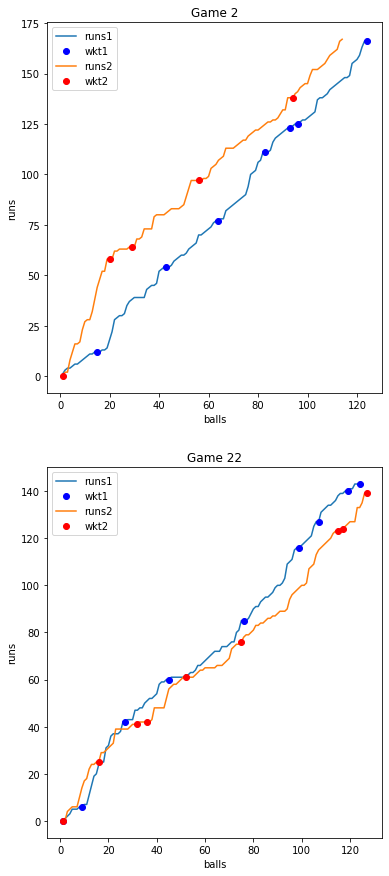

In [48]:
# Inside the square brackets we can type in game numbers, separated by a comma, to specify the games we want to compare
plot_runs_wickets_multi_game([2, 22])

In [54]:
#Selecting games games played by kolkata knights riders as home team
riders = IPLbyb[(IPLbyb['home team'] == 'Kolkata Knight Riders')  & 
                      ((IPLbyb['batting_team'] == 'Royal Challengers Bangalore') | 
                       (IPLbyb['bowling_team'] == 'Royal Challengers Bangalore'))
                      ]
riders['home team'].count()

250

In [58]:
#Selecting games games played by royal challengers bangalore as home team
royal = IPLbyb[(IPLbyb['home team'] == 'Royal Challengers Bangalore')  & 
                      ((IPLbyb['batting_team'] == 'Kolkata Knight Riders') | 
                       (IPLbyb['bowling_team'] == 'Kolkata Knight Riders'))
                      ]
royal['home team'].count()

246

In [59]:
riders_royal = riders.append(royal)
riders_royal = riders_royal.sort_index(ascending = True)
riders_royal = riders_royal.reset_index()

,index,home team,batting_team,bowling_team,gameno,innings_number,over_no,ball_no,runs_total_end,delivery_no,delno^2,runs*wkts,wicket,wkts_total_end
0,484,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,3,1,0,1,4,1,1,0,1,0
1,485,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,3,1,0,2,4,2,4,0,0,0
2,486,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,3,1,0,3,4,3,9,0,0,0
3,487,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,3,1,0,4,10,4,16,0,0,0
4,488,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,3,1,0,5,10,5,25,0,0,0


In [61]:
# Identify if the home team batted first
riders_royal['hometeambatsfirst']= np.where((riders_royal['home team']==riders_royal['batting_team']) & (riders_royal['innings_number']==1),'yes','no')
riders_royal

,index,home team,batting_team,bowling_team,gameno,innings_number,over_no,ball_no,runs_total_end,delivery_no,delno^2,runs*wkts,wicket,wkts_total_end,hometeambatsfirst
0,484,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,3,1,0,1,4,1,1,0,1,0,no
1,485,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,3,1,0,2,4,2,4,0,0,0,no
2,486,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,3,1,0,3,4,3,9,0,0,0,no
3,487,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,3,1,0,4,10,4,16,0,0,0,no
4,488,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,3,1,0,5,10,5,25,0,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,7786,Kolkata Knight Riders,Kolkata Knight Riders,Royal Challengers Bangalore,33,2,13,2,112,85,7225,448,0,4,no
492,7787,Kolkata Knight Riders,Kolkata Knight Riders,Royal Challengers Bangalore,33,2,13,3,114,86,7396,456,0,4,no
493,7788,Kolkata Knight Riders,Kolkata Knight Riders,Royal Challengers Bangalore,33,2,13,4,118,87,7569,472,0,4,no
494,7789,Kolkata Knight Riders,Kolkata Knight Riders,Royal Challengers Bangalore,33,2,13,5,119,88,7744,476,0,4,no


In [62]:
games = riders_royal.drop_duplicates('gameno')

In [63]:
# generate list of games
games = games[['gameno','home team','batting_team','bowling_team','hometeambatsfirst']]
games['road team'] = games.apply(lambda x: x['batting_team'] if x['home team'] == x['bowling_team'] else x['bowling_team'], axis=1)
assert (games['home team'] != games['road team']).all()
games = games[['gameno','home team','road team','hometeambatsfirst']]
games

,gameno,home team,road team,hometeambatsfirst
0,3,Kolkata Knight Riders,Royal Challengers Bangalore,no
244,29,Royal Challengers Bangalore,Kolkata Knight Riders,yes
490,33,Kolkata Knight Riders,Royal Challengers Bangalore,no


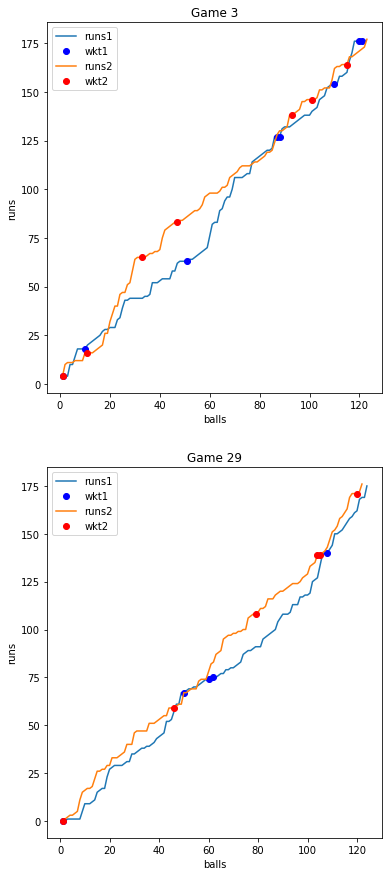

In [64]:
plot_runs_wickets_multi_game([3, 29])

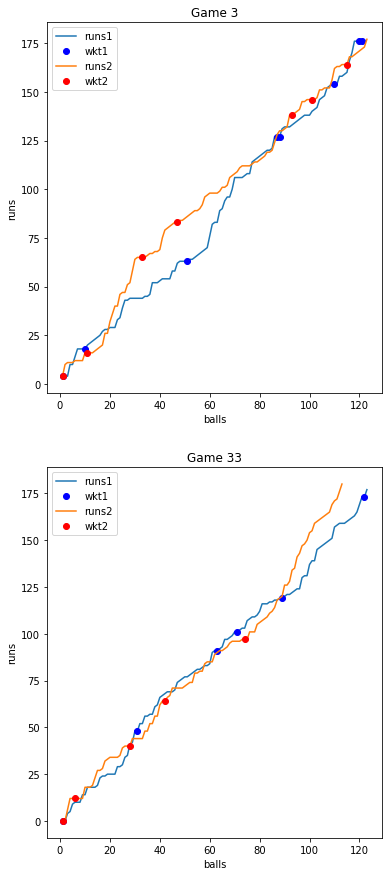

In [84]:
plot_runs_wickets_multi_game([3, 33])

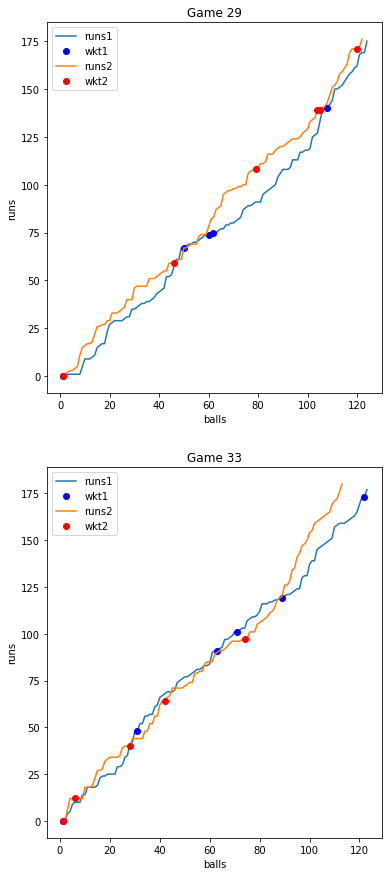

In [85]:
plot_runs_wickets_multi_game([29, 33])

In [68]:
#Selecting games games played by sunrisers as home team
sun = IPLbyb[(IPLbyb['home team'] == 'Sunrisers')  & 
                      ((IPLbyb['batting_team'] == 'Rajasthan Royals') | 
                       (IPLbyb['bowling_team'] == 'Rajasthan Royals'))
                      ]
sun['home team'].count()

225

In [69]:
#Selecting games games played by Rajasthan royals as home team
royals = IPLbyb[(IPLbyb['home team'] == 'Rajasthan Royals')  & 
                      ((IPLbyb['batting_team'] == 'Sunrisers') | 
                       (IPLbyb['bowling_team'] == 'Sunrisers'))
                      ]
royals['home team'].count()

240

In [71]:
royal_sun = sun.append(royals)
royal_sun = royal_sun.sort_index(ascending = True)
royal_sun = royal_sun.reset_index()
royal_sun['home team'].count()

465

In [72]:
# Identify if the home team batted first

royal_sun['hometeambatsfirst']= np.where((royal_sun['home team']==royal_sun['batting_team']) & (royal_sun['innings_number']==1),'yes','no')
royal_sun

,index,home team,batting_team,bowling_team,gameno,innings_number,over_no,ball_no,runs_total_end,delivery_no,delno^2,runs*wkts,wicket,wkts_total_end,hometeambatsfirst
0,728,Sunrisers,Rajasthan Royals,Sunrisers,4,1,0,1,0,1,1,0,1,0,no
1,729,Sunrisers,Rajasthan Royals,Sunrisers,4,1,0,2,1,2,4,0,0,0,no
2,730,Sunrisers,Rajasthan Royals,Sunrisers,4,1,0,3,1,3,9,0,0,0,no
3,731,Sunrisers,Rajasthan Royals,Sunrisers,4,1,0,4,2,4,16,0,0,0,no
4,732,Sunrisers,Rajasthan Royals,Sunrisers,4,1,0,5,6,5,25,0,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,6641,Rajasthan Royals,Rajasthan Royals,Sunrisers,28,2,19,2,136,116,13456,680,0,5,no
461,6642,Rajasthan Royals,Rajasthan Royals,Sunrisers,28,2,19,3,137,117,13689,685,0,5,no
462,6643,Rajasthan Royals,Rajasthan Royals,Sunrisers,28,2,19,4,139,118,13924,695,0,5,no
463,6644,Rajasthan Royals,Rajasthan Royals,Sunrisers,28,2,19,5,139,119,14161,834,1,6,no


In [73]:
games = royal_sun.drop_duplicates('gameno')

In [74]:
# generate list of games

games = games[['gameno','home team','batting_team','bowling_team','hometeambatsfirst']]
games['road team'] = games.apply(lambda x: x['batting_team'] if x['home team'] == x['bowling_team'] else x['bowling_team'], axis=1)
assert (games['home team'] != games['road team']).all()
games = games[['gameno','home team','road team','hometeambatsfirst']]
games

,gameno,home team,road team,hometeambatsfirst
0,4,Sunrisers,Rajasthan Royals,no
225,28,Rajasthan Royals,Sunrisers,no


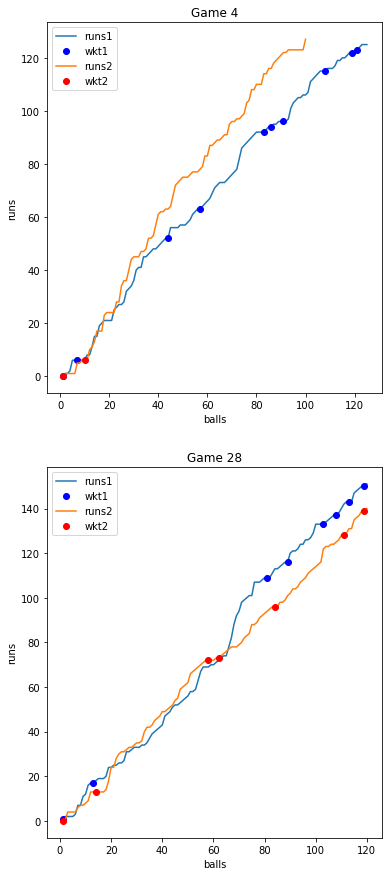

In [75]:
# Inside the square brackets we can type in game numbers, separated by a comma, to specify the games we want to compare

plot_runs_wickets_multi_game([4, 28])

In [76]:
kings = IPLbyb[(IPLbyb['home team'] == 'Chennai Super Kings')  & 
                      ((IPLbyb['batting_team'] == 'Kolkata Knight Riders') | 
                       (IPLbyb['bowling_team'] == 'Kolkata Knight Riders'))
                      ]
kings['home team'].count()

246

In [77]:
riders = IPLbyb[(IPLbyb['home team'] == 'Kolkata Knight Riders')  & 
                      ((IPLbyb['batting_team'] == 'Chennai Super Kings') | 
                       (IPLbyb['bowling_team'] == 'Chennai Super Kings'))
                      ]
riders['home team'].count()

230

In [78]:
kings_riders = kings.append(riders)
kings_riders = kings_riders.sort_index(ascending = True).reset_index()
#royal_sun = royal_sun.reset_index()
kings_riders['home team'].count()

476

In [80]:
# Identify if the home team batted first

kings_riders['hometeambatsfirst']= np.where((kings_riders['home team']==kings_riders['batting_team']) & (kings_riders['innings_number']==1),'yes','no')
kings_riders

,index,home team,batting_team,bowling_team,gameno,innings_number,over_no,ball_no,runs_total_end,delivery_no,delno^2,runs*wkts,wicket,wkts_total_end,hometeambatsfirst
0,953,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,5,1,0,1,0,1,1,0,1,0,no
1,954,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,5,1,0,2,4,2,4,0,0,0,no
2,955,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,5,1,0,3,5,3,9,0,0,0,no
3,956,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,5,1,0,4,6,4,16,0,0,0,no
4,957,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,5,1,0,5,6,5,25,0,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,7810,Kolkata Knight Riders,Kolkata Knight Riders,Chennai Super Kings,33,2,17,1,169,109,11881,676,0,4,no
472,7811,Kolkata Knight Riders,Kolkata Knight Riders,Chennai Super Kings,33,2,17,2,171,110,12100,684,0,4,no
473,7812,Kolkata Knight Riders,Kolkata Knight Riders,Chennai Super Kings,33,2,17,3,172,111,12321,688,0,4,no
474,7813,Kolkata Knight Riders,Kolkata Knight Riders,Chennai Super Kings,33,2,17,4,176,112,12544,704,0,4,no


In [81]:
games = kings_riders.drop_duplicates('gameno')

In [82]:
# generate list of games

games = games[['gameno','home team','batting_team','bowling_team','hometeambatsfirst']]
games['road team'] = games.apply(lambda x: x['batting_team'] if x['home team'] == x['bowling_team'] else x['bowling_team'], axis=1)
assert (games['home team'] != games['road team']).all()
games = games[['gameno','home team','road team','hometeambatsfirst']]
games

,gameno,home team,road team,hometeambatsfirst
0,5,Chennai Super Kings,Kolkata Knight Riders,no
246,33,Kolkata Knight Riders,Chennai Super Kings,no


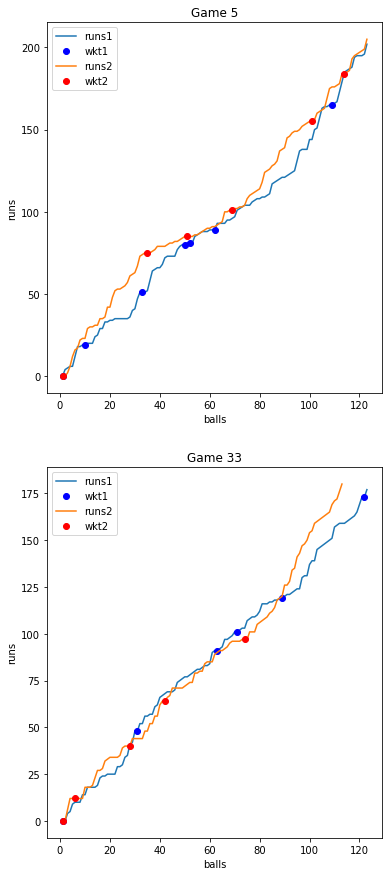

In [83]:
# Inside the square brackets we can type in game numbers, separated by a comma, to specify the games we want to compare

plot_runs_wickets_multi_game([5, 33])